Вариант 23  

Выполнила Соловьева Елизавета 
## Плохая обусловленность метода Кардано:
[Каханер–Моулер–Нэш]

Рассмотрим знаменитые формулы для решения кубического уравнения - *формулы Кардано*,
которые правильнее было бы называть *формулами Ферро-Тартальи-Кардано-Фиора*.

Рассмотрим кубическое уравнение $y^3+ay^2+by+c=0$, где все коэффициенты и неизвестная $y$ в общем случае комплексные.

После замены $y = x-\frac{a}{3}$ в уравнении третьей степени
$y^3+ay^2+by+c=0$ исчезает член с квадратом неизвестной $y$.
Уравнение примет вид
$$
x^3+px+q=0.
$$ 
Его решения можно найти в виде 
$$
x=\alpha + \beta,
$$ 
где $\alpha$, $\beta$ --- некоторые
комплексные числа, 
$$
\alpha=\sqrt[3]{-\frac{q}{2}+\sqrt{\frac{q^2}{4}+\frac{p^3}{27}}},
\qquad
\beta=\sqrt[3]{-\frac{q}{2}-\sqrt{\frac{q^2}{4}+\frac{p^3}{27}}}.
$$
Среди всевозможных комбинаций $\alpha$, $\beta$, получаемых при подстановке всех значений корней кубических,
необходимо выбрать лишь те,
которые удовлетворяют условию $3\alpha\beta+p=0$. 
Легко видеть, что если $\alpha \ne 0$ и $\beta\ne 0$, то
таким образом будет получено $3$ решения: для каждого из трех значений $\alpha$ можно определить единственное $\beta$. 

Реализуйте метод Кардано для нахождения корней кубического уравнения $y^3+ay^2+by+c=0$.
Написанная вами функция `y1, y2, y3 = cardano(a,b,c)` должна работать как для уравнений
с вещественными, так и комплексными коэффициентами.
Воспользуйтесь этим методом для нахождения вещественного корня уравнения
$$
y^3 +3y^2 +\lambda^2y+3\lambda^2 = 0
$$
при различных $\lambda$.
Исследуйте потерю точности из-за ошибок округления при больших $\lambda$
(в частности, для $\lambda$ порядка величины, обратной машинному эпсилон).

Сравните результаты с теми, которые получаются методом Брента `scipy.optimize.brentq` и методом Ньютона `scipy.optimize.newton`.
## Решение:
Подключим необходимые библиотеки:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math
%matplotlib inline

Дано кубическое уравнение вида:
$$ax^3+bx^2+cx+d=0$$
Виделим полный куб:
$$(x + y)^3 = x^3 + 3yx^2 + 3xy^2 + y^3$$
$$a(x^3+\frac{bx^2}{a})+cx+d=0$$
$$a\left(x^3+\frac{3bx^2}{3a} + \frac{3xb^2}{9a^2} - \frac{3xb^2}{9a^2} + \left(\frac{b}{3a}\right)^3 - \left(\frac{b}{3a}\right)^3\right)+cx+d=0$$
$$a\left(x^3+\frac{3bx^2}{3a} + \frac{3xb^2}{9a^2} + \left(\frac{b}{3a}\right)^3\right) - \frac{3xb^2}{9a} - \frac{b^3}{27a^2} +cx+d=0$$
$$a\left(x + \frac{b}{3a}\right)^3 + x\left(c - \frac{b^2}{3a}\right) + d - \frac{b^3}{27a^2} = 0$$
Пусть:
$$y = x + \frac{b}{3a}$$
Тогда:
$$x = y - \frac{b}{3a}$$
Уравнение принимает вид:
$$ay^3 + \left(y - \frac{b}{3a}\right) \left(c - \frac{b^2}{3a}\right) + d - \frac{b^3}{27a^2} = 0$$
$$ay^3 + y\left(c - \frac{b^2}{3a}\right) - \frac{b}{3a}\left(c - \frac{b^2}{3a}\right) + d - \frac{b^3}{27a^2} = 0$$
$$ay^3 + y\left(c - \frac{b^2}{3a}\right) - \frac{bc}{3a} + \frac{b^3}{9a^2} + d - \frac{b^3}{27a^2} = 0$$
$$ay^3 + y\left(c - \frac{b^2}{3a}\right) - \frac{bc}{3a} + d + 2\frac{b^3}{27a^2} = 0$$
Поделим все на а:
$$y^3 + y\left(\frac{c}{a} - \frac{b^2}{3a^2}\right) - \frac{bc}{3a^2} + \frac{d}{a} + 2\left(\frac{b}{3a}\right)^3 = 0$$
Пусть:
$$ p = \left(\frac{c}{a} - \frac{b^2}{3a^2}\right) \qquad q = -\frac{bc}{3a^2} + \frac{d}{a} + 2\left(\frac{b}{3a}\right)^3$$
Получим уравнение:
$$y^3 + yp + q = 0(*)$$
Пусть:
$$Q=\left({\frac  {p}{3}}\right)^{3}+\left({\frac  {q}{2}}\right)^{2}$$
Если все коэффициенты кубического уравнения вещественны, то и Q вещественно, и по его знаку можно определить тип корней
<br>Q > 0 — один вещественный корень и два сопряжённых комплексных корня.
<br>Q = 0 — один однократный вещественный корень и один двукратный, или, если p = q = 0, то один трёхкратный вещественный корень.
<br>Q < 0 — три вещественных корня.
<br>По формуле Кардано, корни кубического уравнения в канонической форме равны:
<br>$y_{1} = \alpha + \beta$
<br>$y_{2,3} = -\frac{\alpha + \beta}{2} \pm i\frac{\alpha - \beta}{2}\sqrt{3}$
<br>Где:
$$\alpha = \sqrt[3]{-\frac{q}{2} + \sqrt{Q}}$$
$$\beta = \sqrt[3]{-\frac{q}{2} - \sqrt{Q}}$$
Реализуем функцию вычисляющую корни кубического уравнения по методу Кардано:

In [3]:
def cardano(b,c,d):
    a = 1
    p = (3*a*c - b**2)/(3 * a**2)
    q = (2*b**3 - 9*a*b*c + 27 * a**2 * d)/(27 * a**3)
    Q = (p/3)**3 + (q/2)**2
    alfa = np.cbrt(-(q/2) + np.sqrt(Q))
    beta = np.cbrt(-(q/2) - np.sqrt(Q))
    if Q > 0:
        k = 0.5j * np.sqrt(3) * (alfa - beta)
    else:
        k = 0.5 * np.sqrt(3) * (alfa - beta)
    y1 = alfa + beta - b/(3*a)
    y2 = -((alfa + beta)/2) + k - b/(3*a)
    y3 = -((alfa + beta)/2) - k - b/(3*a)
    return y1,y2,y3

Реализуем функцию: $$f(y,\lambda) =  y^3 +3y^2 +\lambda^2y+3\lambda^2$$


In [4]:
def f(y,a):
    return y ** 3 + 3 * y ** 2 + a ** 2 * y + 3 * a ** 2

Построим график, показывающий то, какое отклонение возникает при использовании больших $\lambda$ (в частности, для  𝜆
  порядка величины, обратной машинному эпсилон).

Ymin = -1.6645074028614005e+31
Ymax = 1.0120912251027543e+31


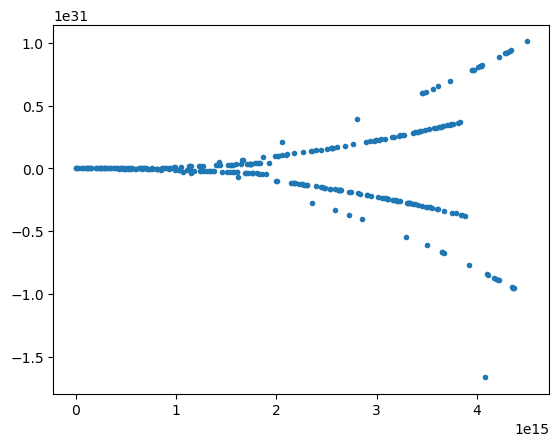

In [30]:
Ymin = float('inf')
Ymax = float('-inf')
alfa = np.linspace(0, 1./np.finfo(float).eps, 1000)
xx = np.array([])
yy = np.array([])
for a in alfa: 
    x = cardano(3, a**2, 3*a**2)[0]#Используем 1-ый корень из уравнения
    y = f(x, a)
    if y != 0:
        Ymax = max(Ymax, y)
        Ymin = min(Ymin, y)
        xx = np.append(xx,a)
        yy = np.append(yy,y)
plt.plot(xx,yy,'.')
pass
print('Ymin = {0}'.format(Ymin))
print('Ymax = {0}'.format(Ymax))

Сравнение эффективости метода Кардано с методами Брента и Ньютона:

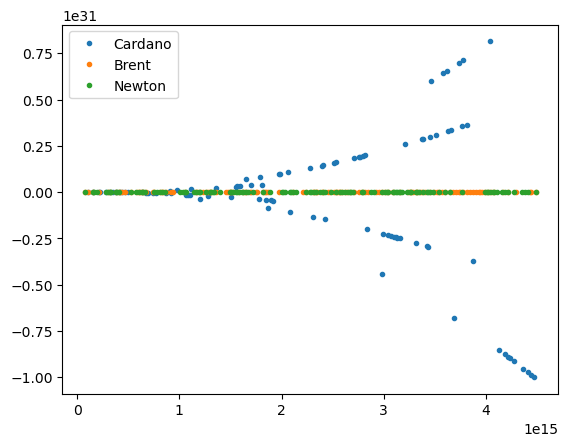

In [48]:
alfa = np.linspace(0,  1./np.finfo(float).eps, 300)
xx = np.array([])
cardano_y = np.array([])
newton_y  = np.array([])
brentq_y = np.array([])
cardano_x = np.array([])
newton_x  = np.array([])
brentq_x = np.array([])
for a in alfa: 
    expression = lambda _x:f(_x, a)
    y = f(cardano(3, a**2, 3*a**2)[0],a)
    if y != 0:
        cardano_y = np.append(cardano_y,y)
        cardano_x = np.append(cardano_x,a)
    y = f(opt.newton(expression, 0), a)
    if y != 0:
        newton_y = np.append(newton_y,y)
        newton_x = np.append(newton_x,a)
    y = f(opt.brentq(expression, -1000, 1000), a)
    if y != 0:
        brentq_y = np.append(brentq_y,y)
        brentq_x = np.append(brentq_x,a)
    xx = np.append(xx,a)
  
plt.plot(cardano_x,cardano_y,'.',label = "Cardano")
plt.plot(brentq_x,brentq_y,'.',label = 'Brent')
plt.plot(newton_x,newton_y,'.', label = 'Newton')
plt.legend()
pass

Построим график в логарифмический график:

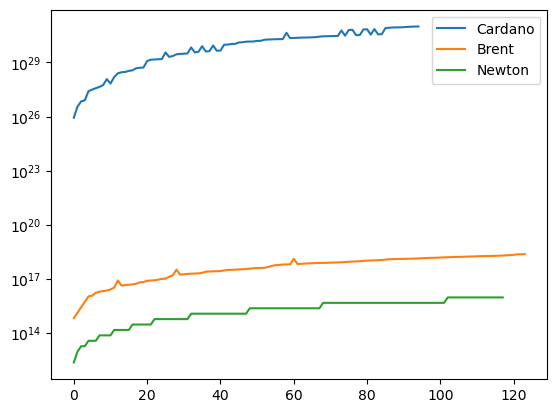

In [53]:
plt.semilogy(np.abs(cardano_y),'-',label = "Cardano")
plt.semilogy(np.abs(brentq_y),'-',label = 'Brent')
plt.semilogy(np.abs(newton_y),'-', label = 'Newton')
plt.legend()
pass

Вывод:

Анализируя график,можно сделать вывод, что метод Кардано делает больше ошибок при большем количестве значений на входе. Это явление можно наблюдать как на обычном графике, так и на логарифмическом, построенном с помощью semilogy. А методы Брента и Ньютона делают практически одинаковое количество ошибок, но значительно меньше, чем с помощью метода Кардано.
